In [1]:
#!pip install --user imblearn

Import all used  libraries

In [2]:
##Import all used  libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Load the dataset
df = pd.read_csv("Aggressive_Driving.csv")

# Print the first few rows of the dataset
df.head()

,X,Y,INDEX_,ACCNUM,YEAR,DATE,TIME,STREET1,STREET2,OFFSET,...,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,DIVISION,ObjectId
0,-8.823749e+06,5.427073e+06,3452285,916791.0,2006,2006/08/03 04:00:00+00,319,MIDLAND AVE,LAWRENCE AVE E,NaN,...,Yes,Yes,NaN,NaN,126,Dorset Park,126,Dorset Park (126),D41,1
1,-8.823749e+06,5.427073e+06,3452286,916791.0,2006,2006/08/03 04:00:00+00,319,MIDLAND AVE,LAWRENCE AVE E,NaN,...,Yes,Yes,NaN,NaN,126,Dorset Park,126,Dorset Park (126),D41,2
2,-8.823749e+06,5.427073e+06,3452287,916791.0,2006,2006/08/03 04:00:00+00,319,MIDLAND AVE,LAWRENCE AVE E,NaN,...,Yes,Yes,NaN,NaN,126,Dorset Park,126,Dorset Park (126),D41,3
3,-8.823749e+06,5.427073e+06,3452288,916791.0,2006,2006/08/03 04:00:00+00,319,MIDLAND AVE,LAWRENCE AVE E,NaN,...,Yes,Yes,NaN,NaN,126,Dorset Park,126,Dorset Park (126),D41,4
4,-8.839690e+06,5.428692e+06,3603522,920424.0,2006,2006/08/03 04:00:00+00,1831,SHEPPARD AVE E,DORIS AVE,NaN,...,Yes,NaN,NaN,NaN,153,Avondale,51,Willowdale East (51),D32,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9460 entries, 0 to 9459
Data columns (total 57 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  9460 non-null   float64
 1   Y                  9460 non-null   float64
 2   INDEX_             9460 non-null   int64  
 3   ACCNUM             6825 non-null   float64
 4   YEAR               9460 non-null   int64  
 5   DATE               9460 non-null   object 
 6   TIME               9460 non-null   int64  
 7   STREET1            9460 non-null   object 
 8   STREET2            8796 non-null   object 
 9   OFFSET             1599 non-null   object 
 10  ROAD_CLASS         9241 non-null   object 
 11  DISTRICT           9411 non-null   object 
 12  WARDNUM            9051 non-null   float64
 13  LATITUDE           9460 non-null   float64
 14  LONGITUDE          9460 non-null   float64
 15  LOCCOORD           9452 non-null   object 
 16  ACCLOC             7195 

In [5]:
df.describe()

,X,Y,INDEX_,ACCNUM,YEAR,TIME,WARDNUM,LATITUDE,LONGITUDE,FATAL_NO,ObjectId
count,9.460000e+03,9.460000e+03,9.460000e+03,6.825000e+03,9460.000000,9460.000000,9051.000000,9460.000000,9460.000000,381.000000,9460.000000
mean,-8.838423e+06,5.421250e+06,3.975847e+07,4.783086e+08,2013.123996,1346.560782,638.437521,43.713719,-79.396907,27.968504,4730.500000
std,1.198364e+04,8.686353e+03,3.744307e+07,1.124029e+09,4.785156,639.807001,7882.062468,0.056396,0.107651,17.549601,2731.011107
min,-8.865305e+06,5.402526e+06,3.363864e+06,3.733000e+04,2006.000000,0.000000,1.000000,43.592047,-79.638390,1.000000,1.000000
25%,-8.847579e+06,5.413722e+06,5.411490e+06,1.024623e+06,2009.000000,905.000000,6.000000,43.664845,-79.479152,14.000000,2365.750000
50%,-8.838117e+06,5.420709e+06,7.807388e+06,1.205176e+06,2013.000000,1442.000000,14.000000,43.710231,-79.394153,26.000000,4730.500000
75%,-8.829258e+06,5.428128e+06,8.087706e+07,1.372879e+06,2017.000000,1846.000000,22.000000,43.758389,-79.314578,40.000000,7095.250000
max,-8.808889e+06,5.443099e+06,8.170606e+07,4.008024e+09,2022.000000,2358.000000,162120.000000,43.855445,-79.131595,75.000000,9460.000000


In [6]:
# List of index positions of columns to be dropped
columns_to_drop = [2,3,4,5,6,7,8,9,10,11,12,13,14,26,27,28,30,31,32,33,34,35,36,37,38,39,43,44,50,51,52,53,54,55,56]

# Drop columns by index positions
df = df.drop(df.columns[columns_to_drop], axis=1)
df.head()


,X,Y,LOCCOORD,ACCLOC,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,ACCLASS,IMPACTYPE,...,INJURY,MANOEUVER,AUTOMOBILE,MOTORCYCLE,TRUCK,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL
0,-8.823749e+06,5.427073e+06,Intersection,At Intersection,Traffic Signal,Clear,Dark,Dry,Non-Fatal Injury,Angle,...,Minimal,Going Ahead,Yes,NaN,NaN,Yes,NaN,Yes,Yes,NaN
1,-8.823749e+06,5.427073e+06,Intersection,At Intersection,Traffic Signal,Clear,Dark,Dry,Non-Fatal Injury,Angle,...,None,NaN,Yes,NaN,NaN,Yes,NaN,Yes,Yes,NaN
2,-8.823749e+06,5.427073e+06,Intersection,At Intersection,Traffic Signal,Clear,Dark,Dry,Non-Fatal Injury,Angle,...,Major,NaN,Yes,NaN,NaN,Yes,NaN,Yes,Yes,NaN
3,-8.823749e+06,5.427073e+06,Intersection,At Intersection,Traffic Signal,Clear,Dark,Dry,Non-Fatal Injury,Angle,...,Major,Going Ahead,Yes,NaN,NaN,Yes,NaN,Yes,Yes,NaN
4,-8.839690e+06,5.428692e+06,Intersection,NaN,Traffic Signal,Clear,Daylight,Dry,Non-Fatal Injury,Pedestrian Collisions,...,None,Going Ahead,Yes,NaN,NaN,NaN,NaN,Yes,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9460 entries, 0 to 9459
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   X           9460 non-null   float64
 1   Y           9460 non-null   float64
 2   LOCCOORD    9452 non-null   object 
 3   ACCLOC      7195 non-null   object 
 4   TRAFFCTL    9456 non-null   object 
 5   VISIBILITY  9448 non-null   object 
 6   LIGHT       9460 non-null   object 
 7   RDSFCOND    9446 non-null   object 
 8   ACCLASS     9460 non-null   object 
 9   IMPACTYPE   9460 non-null   object 
 10  INVTYPE     9455 non-null   object 
 11  INVAGE      9460 non-null   object 
 12  INJURY      8646 non-null   object 
 13  MANOEUVER   5564 non-null   object 
 14  AUTOMOBILE  8991 non-null   object 
 15  MOTORCYCLE  1015 non-null   object 
 16  TRUCK       554 non-null    object 
 17  PASSENGER   4188 non-null   object 
 18  SPEEDING    2575 non-null   object 
 19  AG_DRIV     9460 non-null  

In [8]:
import pandas as pd

# Assuming df is your DataFrame

unique_values_table = pd.DataFrame(columns=['Column Name', 'Unique Values'])

for column in df.columns:
    unique_values = df[column].unique()
    unique_values_table = unique_values_table.append({'Column Name': column, 'Unique Values': unique_values}, ignore_index=True)

print(unique_values_table)

   Column Name                                      Unique Values
0            X  [-8823749.456483, -8839690.4075646, -8837820.2...
1            Y  [5427073.35989488, 5428691.64021183, 5410859.9...
2     LOCCOORD  [Intersection, Mid-Block, Exit Ramp Westbound,...
3       ACCLOC  [At Intersection, nan, Non Intersection, Inter...
4     TRAFFCTL  [Traffic Signal, No Control, Stop Sign, Pedest...
5   VISIBILITY  [Clear, Rain, Snow, Strong wind, Freezing Rain...
6        LIGHT  [Dark, Daylight, Dusk, Dawn, Dusk, artificial,...
7     RDSFCOND  [Dry, Wet, Packed Snow, Loose Snow, Ice, Slush...
8      ACCLASS    [Non-Fatal Injury, Fatal, Property Damage Only]
9    IMPACTYPE  [Angle, Pedestrian Collisions, SMV Unattended ...
10     INVTYPE  [Driver, Vehicle Owner, Passenger, Pedestrian,...
11      INVAGE  [45 to 49, unknown, 50 to 54, 35 to 39, 55 to ...
12      INJURY          [Minimal, None, Major, Fatal, Minor, nan]
13   MANOEUVER  [Going Ahead, nan, Turning Left, Stopped, Park...
14  AUTOMO

C:\Users\om201\AppData\Local\Temp\ipykernel_2160\3734020911.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  unique_values_table = unique_values_table.append({'Column Name': column, 'Unique Values': unique_values}, ignore_index=True)
C:\Users\om201\AppData\Local\Temp\ipykernel_2160\3734020911.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  unique_values_table = unique_values_table.append({'Column Name': column, 'Unique Values': unique_values}, ignore_index=True)
C:\Users\om201\AppData\Local\Temp\ipykernel_2160\3734020911.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  unique_values_table = unique_values_table.append({'Column Name': column, 'Unique Values': unique_values}, ignore_index=True)
C:\Users\om201\AppData

In [9]:
# Change values in the 'LOCCORD' column if the value is not "Intersection" to be other
df.loc[df['LOCCOORD'] != 'Intersection', 'LOCCOORD'] = 'Other'

In [10]:
# Count the number of null values in each column
null_counts = df.isnull().sum()

print(null_counts)

X                0
Y                0
LOCCOORD         0
ACCLOC        2265
TRAFFCTL         4
VISIBILITY      12
LIGHT            0
RDSFCOND        14
ACCLASS          0
IMPACTYPE        0
INVTYPE          5
INVAGE           0
INJURY         814
MANOEUVER     3896
AUTOMOBILE     469
MOTORCYCLE    8445
TRUCK         8906
PASSENGER     5272
SPEEDING      6885
AG_DRIV          0
REDLIGHT      7940
ALCOHOL       8926
dtype: int64


In [11]:
# Change values in the 'ACCLOC' column if the value is not "At Intersection" to be other
df.loc[df['ACCLOC'] != 'At Intersection', 'ACCLOC'] = 'Other'

In [12]:
# i am interested in the traffic signal, so i will consider the columns value to be traffic signal or not
# Change values in the 'TRAFFCTL' column if the value is not "Traffic Signal" to be other
df.loc[df['TRAFFCTL'] != 'Traffic Signal', 'TRAFFCTL'] = 'Other'

In [13]:
import pandas as pd

# Assuming df is your DataFrame

value_to_keep = 'Other'

# Create a boolean mask for rows where any column is not equal to the desired value
mask = (df == value_to_keep).any(axis=1)

# Drop rows based on the mask
df = df[~mask]

# Print the filtered DataFrame
print(df)

                 X             Y      LOCCOORD           ACCLOC  \
0    -8.823749e+06  5.427073e+06  Intersection  At Intersection   
1    -8.823749e+06  5.427073e+06  Intersection  At Intersection   
2    -8.823749e+06  5.427073e+06  Intersection  At Intersection   
3    -8.823749e+06  5.427073e+06  Intersection  At Intersection   
21   -8.840926e+06  5.433841e+06  Intersection  At Intersection   
...            ...           ...           ...              ...   
9444 -8.838546e+06  5.411879e+06  Intersection  At Intersection   
9445 -8.839104e+06  5.417695e+06  Intersection  At Intersection   
9446 -8.839104e+06  5.417695e+06  Intersection  At Intersection   
9449 -8.840435e+06  5.410109e+06  Intersection  At Intersection   
9450 -8.840435e+06  5.410109e+06  Intersection  At Intersection   

            TRAFFCTL     VISIBILITY             LIGHT RDSFCOND  \
0     Traffic Signal          Clear              Dark      Dry   
1     Traffic Signal          Clear              Dark      Dry 

In [14]:
# List of column indices to update
columns_to_update = [14,15,16,17,18,19,20,21]

# Iterate through the specified columns
for col_index in columns_to_update:
    # Update values that are not 'Yes' to 'No'
    df.iloc[:, col_index] = df.iloc[:, col_index].apply(lambda x: 'No' if x != 'Yes' else x)


In [15]:
# List of index positions of columns to be dropped
columns_to_drop = [2,3,4]

# Drop columns by index positions
df = df.drop(df.columns[columns_to_drop], axis=1)
df.head()

,X,Y,VISIBILITY,LIGHT,RDSFCOND,ACCLASS,IMPACTYPE,INVTYPE,INVAGE,INJURY,MANOEUVER,AUTOMOBILE,MOTORCYCLE,TRUCK,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL
0,-8.823749e+06,5.427073e+06,Clear,Dark,Dry,Non-Fatal Injury,Angle,Driver,45 to 49,Minimal,Going Ahead,Yes,No,No,Yes,No,Yes,Yes,No
1,-8.823749e+06,5.427073e+06,Clear,Dark,Dry,Non-Fatal Injury,Angle,Vehicle Owner,unknown,None,NaN,Yes,No,No,Yes,No,Yes,Yes,No
2,-8.823749e+06,5.427073e+06,Clear,Dark,Dry,Non-Fatal Injury,Angle,Passenger,50 to 54,Major,NaN,Yes,No,No,Yes,No,Yes,Yes,No
3,-8.823749e+06,5.427073e+06,Clear,Dark,Dry,Non-Fatal Injury,Angle,Driver,35 to 39,Major,Going Ahead,Yes,No,No,Yes,No,Yes,Yes,No
21,-8.840926e+06,5.433841e+06,Clear,Daylight,Dry,Non-Fatal Injury,Pedestrian Collisions,Driver,40 to 44,None,Turning Left,Yes,No,No,No,No,Yes,No,No


In [16]:
null_counts = df.isnull().sum()

print(null_counts)
df.info()

X                0
Y                0
VISIBILITY       6
LIGHT            0
RDSFCOND         6
ACCLASS          0
IMPACTYPE        0
INVTYPE          1
INVAGE           0
INJURY         302
MANOEUVER     1678
AUTOMOBILE       0
MOTORCYCLE       0
TRUCK            0
PASSENGER        0
SPEEDING         0
AG_DRIV          0
REDLIGHT         0
ALCOHOL          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3833 entries, 0 to 9450
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   X           3833 non-null   float64
 1   Y           3833 non-null   float64
 2   VISIBILITY  3827 non-null   object 
 3   LIGHT       3833 non-null   object 
 4   RDSFCOND    3827 non-null   object 
 5   ACCLASS     3833 non-null   object 
 6   IMPACTYPE   3833 non-null   object 
 7   INVTYPE     3832 non-null   object 
 8   INVAGE      3833 non-null   object 
 9   INJURY      3531 non-null   object 
 10  MANOEUVER   2155 non-n

In [17]:
# fill the 'INJURY' column with the mode 
mode_value = df['INJURY'].mode()[0]
df['INJURY'] = df['INJURY'].fillna(mode_value)
# fill the 'VISIBILITY' column with the mode 
mode_value = df['VISIBILITY'].mode()[0]
df['VISIBILITY'] = df['VISIBILITY'].fillna(mode_value)
# fill the 'RDSFCOND' column with the mode 
mode_value = df['RDSFCOND'].mode()[0]
df['RDSFCOND'] = df['RDSFCOND'].fillna(mode_value)
# fill the 'INVTYPE' column with the mode 
mode_value = df['INVTYPE'].mode()[0]
df['INVTYPE'] = df['INVTYPE'].fillna(mode_value)
# i choose to drop the 'MANOEUVER' column becaues has many null values 
columns_to_drop= [5,6,7,9,10,16]
df = df.drop(df.columns[columns_to_drop], axis=1)
df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 3833 entries, 0 to 9450
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   X           3833 non-null   float64
 1   Y           3833 non-null   float64
 2   VISIBILITY  3833 non-null   object 
 3   LIGHT       3833 non-null   object 
 4   RDSFCOND    3833 non-null   object 
 5   INVAGE      3833 non-null   object 
 6   AUTOMOBILE  3833 non-null   object 
 7   MOTORCYCLE  3833 non-null   object 
 8   TRUCK       3833 non-null   object 
 9   PASSENGER   3833 non-null   object 
 10  SPEEDING    3833 non-null   object 
 11  REDLIGHT    3833 non-null   object 
 12  ALCOHOL     3833 non-null   object 
dtypes: float64(2), object(11)
memory usage: 419.2+ KB


In [18]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3833 entries, 0 to 9450
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   X           3833 non-null   float64
 1   Y           3833 non-null   float64
 2   VISIBILITY  3833 non-null   object 
 3   LIGHT       3833 non-null   object 
 4   RDSFCOND    3833 non-null   object 
 5   INVAGE      3833 non-null   object 
 6   AUTOMOBILE  3833 non-null   object 
 7   MOTORCYCLE  3833 non-null   object 
 8   TRUCK       3833 non-null   object 
 9   PASSENGER   3833 non-null   object 
 10  SPEEDING    3833 non-null   object 
 11  REDLIGHT    3833 non-null   object 
 12  ALCOHOL     3833 non-null   object 
dtypes: float64(2), object(11)
memory usage: 419.2+ KB


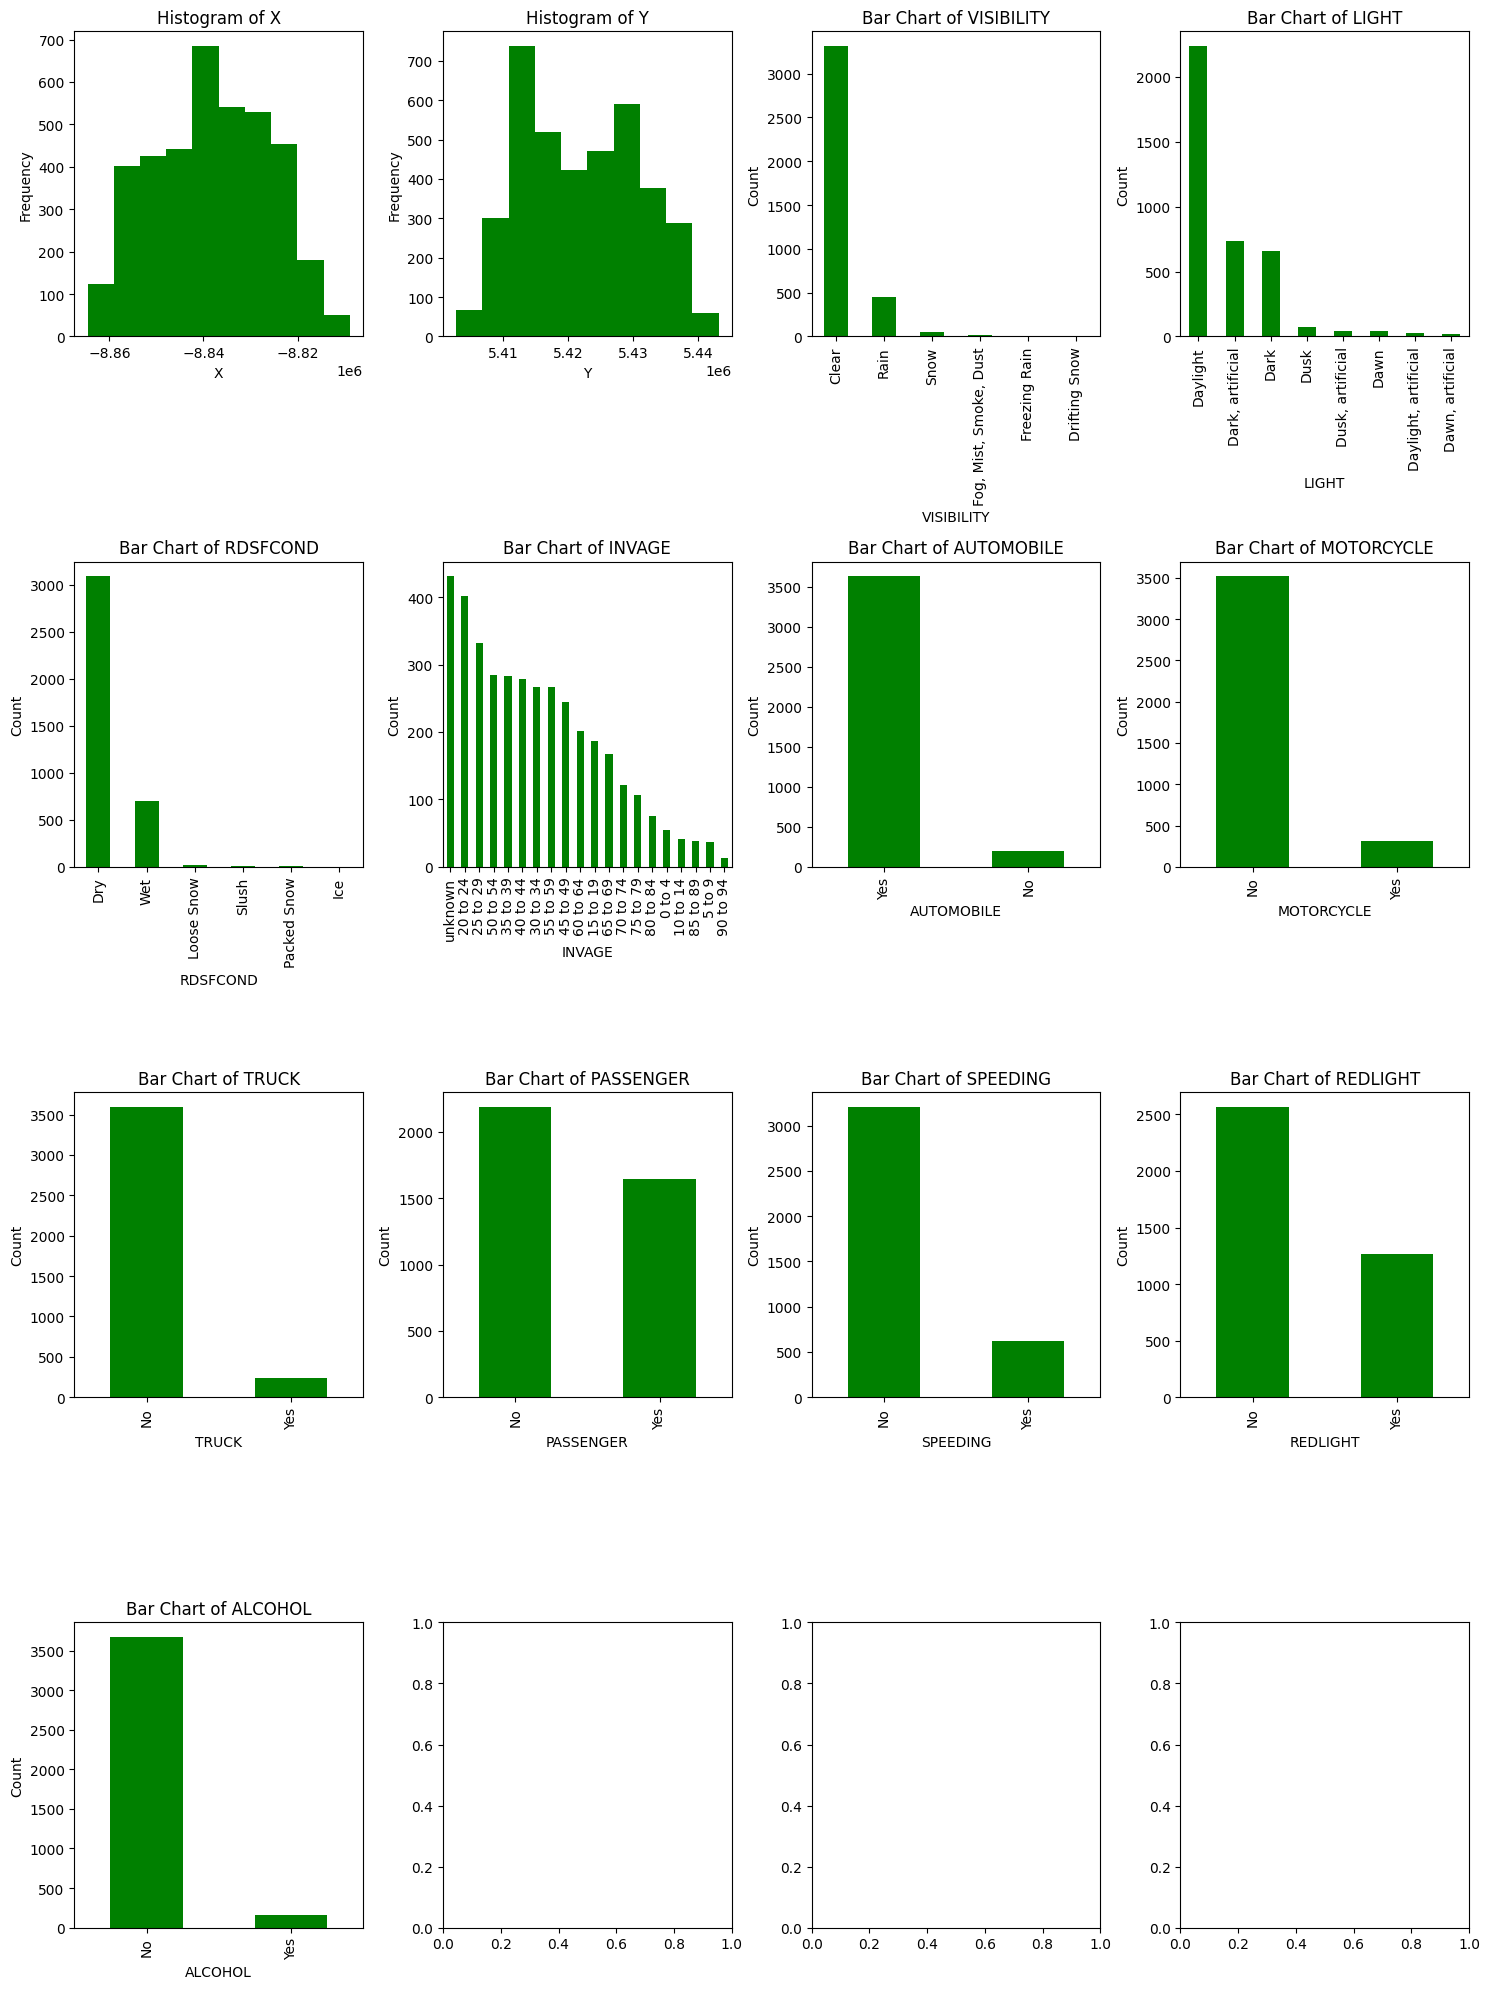

In [19]:
# Get column names and data types
column_names = df.columns

import matplotlib.pyplot as plt
import math

# Calculate the number of rows and columns needed for subplots
num_cols = 4
num_rows = math.ceil(len(column_names) / num_cols)

# Create subplots with calculated rows and columns
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 20))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate through columns and draw appropriate charts
for i, column in enumerate(column_names):
    ax = axes[i]  # Get the current axis

    if df[column].dtype == 'float64':
        # Draw a histogram for numerical columns
        df[column].plot(kind='hist', bins=10, ax=ax, color='green')  # Change color here
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')
        ax.set_title(f'Histogram of {column}')
    else:
        # Draw a bar chart for categorical columns
        category_counts = df[column].value_counts()
        category_counts.plot(kind='bar', ax=ax, color='green')  # Change color here
        ax.set_xlabel(column)
        ax.set_ylabel('Count')
        ax.set_title(f'Bar Chart of {column}')

# Adjust layout
plt.tight_layout()
plt.show()


In [20]:
##

In [21]:
# Mapping of 'Yes' to 1 and 'No' to 0
mapping = {'Yes': 1, 'No': 0}

# Apply the mapping to all columns
df = df.replace(mapping)
df.head()

,X,Y,VISIBILITY,LIGHT,RDSFCOND,INVAGE,AUTOMOBILE,MOTORCYCLE,TRUCK,PASSENGER,SPEEDING,REDLIGHT,ALCOHOL
0,-8.823749e+06,5.427073e+06,Clear,Dark,Dry,45 to 49,1,0,0,1,0,1,0
1,-8.823749e+06,5.427073e+06,Clear,Dark,Dry,unknown,1,0,0,1,0,1,0
2,-8.823749e+06,5.427073e+06,Clear,Dark,Dry,50 to 54,1,0,0,1,0,1,0
3,-8.823749e+06,5.427073e+06,Clear,Dark,Dry,35 to 39,1,0,0,1,0,1,0
21,-8.840926e+06,5.433841e+06,Clear,Daylight,Dry,40 to 44,1,0,0,0,0,0,0


In [22]:
import pandas as pd
import scipy.stats# Calculate point-biserial correlation coefficient
correlation, p_value = scipy.stats.pointbiserialr(df['REDLIGHT'], df['SPEEDING'])

print("Point-Biserial Correlation:", correlation)
print("P-value: ", p_value)

Point-Biserial Correlation: -0.0031841708791093427
P-value:  0.8437710957239934


In [23]:
df = pd.get_dummies(
    data=df,
    columns=['VISIBILITY','LIGHT','INVAGE','RDSFCOND'],
    prefix=['VISIBILITY','LIGHT','INVAGE','RDSFCOND'])

df = df.reindex(sorted(df.columns), axis=1)


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3833 entries, 0 to 9450
Data columns (total 49 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ALCOHOL                            3833 non-null   int64  
 1   AUTOMOBILE                         3833 non-null   int64  
 2   INVAGE_0 to 4                      3833 non-null   uint8  
 3   INVAGE_10 to 14                    3833 non-null   uint8  
 4   INVAGE_15 to 19                    3833 non-null   uint8  
 5   INVAGE_20 to 24                    3833 non-null   uint8  
 6   INVAGE_25 to 29                    3833 non-null   uint8  
 7   INVAGE_30 to 34                    3833 non-null   uint8  
 8   INVAGE_35 to 39                    3833 non-null   uint8  
 9   INVAGE_40 to 44                    3833 non-null   uint8  
 10  INVAGE_45 to 49                    3833 non-null   uint8  
 11  INVAGE_5 to 9                      3833 non-null   uint8

In [25]:
# Change the index of column 'Red-light' from 19 to 20
# Column name to move to the last position
column_to_move = 'REDLIGHT'

# Get the index of the column to move
column_index = df.columns.get_loc(column_to_move)

# Reorder columns
cols = list(df.columns)
cols.pop(column_index)
cols.append(column_to_move)
df = df[cols]


# Appropriate measures

In [26]:
SEED = 777

np.random.seed(SEED)

In [27]:
from sklearn.metrics import f1_score, make_scorer, classification_report, confusion_matrix, accuracy_score

f1 = make_scorer(f1_score, average='macro')

In [28]:
# create X_data, y_data
X_data = df.iloc[:,:-1].values
y_data = df.iloc[:,-1].values

In [29]:
print(y_data)

[1 1 1 ... 0 0 0]


In [30]:
# split into train-val-test
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, train_size=0.7, random_state=777, stratify=y_data)


In [31]:
np.unique(y_data, return_counts=True)

(array([0, 1], dtype=int64), array([2569, 1264], dtype=int64))

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif

k_best = SelectKBest(score_func=f_classif, k=20)  # Select the top 20X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, train_size=0.5, random_state=777, stratify=y_test) features

X_train = k_best.fit_transform(X_train, y_train)
X_test = k_best.transform(X_test)



X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, train_size=0.5, random_state=777, stratify=y_test)



In [33]:
print('X_data={}'.format(X_data.shape))
print('X_train={}, X_val={}, X_test={}'.format(X_train.shape, X_val.shape, X_test.shape))
print('y_train={}, y_val={}, y_test={}'.format(y_train.shape, y_val.shape, y_test.shape))
print()
print('class % in y_train = {}'.format((np.unique(y_train, return_counts=True)[1]/y_train.shape[0]).round(2)))
print('class % in y_val = {}'.format((np.unique(y_val, return_counts=True)[1]/y_val.shape[0]).round(2)))
print('class % in y_test = {}'.format((np.unique(y_test, return_counts=True)[1]/y_test.shape[0]).round(2)))

X_data=(3833, 48)
X_train=(2683, 20), X_val=(575, 20), X_test=(575, 20)
y_train=(2683,), y_val=(575,), y_test=(575,)

class % in y_train = [0.67 0.33]
class % in y_val = [0.67 0.33]
class % in y_test = [0.67 0.33]


In [34]:
#Get the indices of the selected features
selected_feature_indices = k_best.get_support(indices=True)

# Print the selected feature indices and column names
selected_feature_column_names = df.columns[selected_feature_indices]
print("Selected Feature Indices:", selected_feature_indices)
print("Selected Feature Column Names:", selected_feature_column_names)

Selected Feature Indices: [ 0  1  8 10 14 15 16 17 18 25 27 30 31 35 36 37 39 40 44 47]
Selected Feature Column Names: Index(['ALCOHOL', 'AUTOMOBILE', 'INVAGE_35 to 39', 'INVAGE_45 to 49',
       'INVAGE_60 to 64', 'INVAGE_65 to 69', 'INVAGE_70 to 74',
       'INVAGE_75 to 79', 'INVAGE_80 to 84', 'LIGHT_Dawn, artificial',
       'LIGHT_Daylight, artificial', 'MOTORCYCLE', 'PASSENGER',
       'RDSFCOND_Packed Snow', 'RDSFCOND_Slush', 'RDSFCOND_Wet', 'TRUCK',
       'VISIBILITY_Clear', 'VISIBILITY_Rain', 'Y'],
      dtype='object')


In [35]:
print(selected_feature_column_names)

Index(['ALCOHOL', 'AUTOMOBILE', 'INVAGE_35 to 39', 'INVAGE_45 to 49',
       'INVAGE_60 to 64', 'INVAGE_65 to 69', 'INVAGE_70 to 74',
       'INVAGE_75 to 79', 'INVAGE_80 to 84', 'LIGHT_Dawn, artificial',
       'LIGHT_Daylight, artificial', 'MOTORCYCLE', 'PASSENGER',
       'RDSFCOND_Packed Snow', 'RDSFCOND_Slush', 'RDSFCOND_Wet', 'TRUCK',
       'VISIBILITY_Clear', 'VISIBILITY_Rain', 'Y'],
      dtype='object')


# Training classifiers

## KNN 


In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = { 'p': [1,2],  
    "algorithm":['auto', 'ball_tree', 'kd_tree', 'brute'],
    'n_neighbors':[1, 2, 3, 4, 5, 6, 8, 9, 10,15,20,25],  }

In [37]:
grid_search_KNN= GridSearchCV(sklearn.neighbors.KNeighborsClassifier(), param_grid, verbose = 1, n_jobs=-1, scoring=f1)   

grid_search_KNN.fit(X_train, y_train)  

print(grid_search_KNN.best_params_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
{'algorithm': 'kd_tree', 'n_neighbors': 1, 'p': 1}


In [38]:
y_pred_on_val = grid_search_KNN.predict(X_val)
print("The training acccuracy is: %.3f" % grid_search_KNN.best_score_)
print("The validation acccuracy is: %.3f" % sklearn.metrics.accuracy_score(y_val, y_pred_on_val))
print("The f1 score is: %.3f" % f1_score(y_val, y_pred_on_val, average='macro'))

The training acccuracy is: 0.902
The validation acccuracy is: 0.922
The f1 score is: 0.911


## Decision Tree

In [39]:
from sklearn.tree import DecisionTreeClassifier

param_grid_TREE = { 'max_features': ['sqrt', 'log2'],
                    'criterion': ['gini', 'entropy'],  
                    'splitter':['best', 'random'],
                    'max_depth':[1, 2, 3, 4, 5, 6, 8, 9, 10, 15, 20,  30, 50, 80, 100, 130]}

grid_search_dTree=GridSearchCV(DecisionTreeClassifier(), param_grid_TREE, verbose = 1, n_jobs=-1, scoring=f1)   

grid_search_dTree = grid_search_dTree.fit(X_train,y_train)

print(grid_search_dTree.best_params_) 

Fitting 5 folds for each of 128 candidates, totalling 640 fits
{'criterion': 'entropy', 'max_depth': 130, 'max_features': 'log2', 'splitter': 'random'}


In [40]:
y_pred_on_val = grid_search_dTree.predict(X_val)
print("The training acccuracy is: %.3f" % grid_search_dTree.best_score_)
print("The validation acccuracy is: %.3f" % sklearn.metrics.accuracy_score(y_val, y_pred_on_val))
print("The f1 score is: %.3f" % f1_score(y_val, y_pred_on_val, average='macro'))

The training acccuracy is: 0.811
The validation acccuracy is: 0.823
The f1 score is: 0.796


In [41]:
#dTree_best = grid_search_dTree.best_estimator_
#imp_df = pd.DataFrame({
#    "Varname": df.columns.drop('REDLIGHT'),
#    "Imp": dTree_best.feature_importances_
#})
#imp_df.sort_values(by="Imp", ascending=False).T

## Bagging

In [42]:
from sklearn.ensemble import BaggingClassifier

params = {'max_features': [0.5, 0.7, 1.0],
          'max_samples': [0.5, 0.7, 1.0],
          'n_estimators': [2, 5, 10, 20, 30, 50, 100]
         }

grid_search_bagging = GridSearchCV(BaggingClassifier(DecisionTreeClassifier()), param_grid=params, n_jobs=-1, verbose=1, scoring=f1)

grid_search_bagging.fit(X_train, y_train)

Fitting 5 folds for each of 63 candidates, totalling 315 fits


GridSearchCV(estimator=BaggingClassifier(estimator=DecisionTreeClassifier()),
             n_jobs=-1,
             param_grid={'max_features': [0.5, 0.7, 1.0],
                         'max_samples': [0.5, 0.7, 1.0],
                         'n_estimators': [2, 5, 10, 20, 30, 50, 100]},
             scoring=make_scorer(f1_score, average=macro), verbose=1)

In [43]:
y_pred_on_val = grid_search_bagging.predict(X_val)
print("The training acccuracy is: %.3f" % grid_search_bagging.best_score_)
print("The validation acccuracy is: %.3f" % sklearn.metrics.accuracy_score(y_val, y_pred_on_val))
print("The f1 score is: %.3f" % f1_score(y_val, y_pred_on_val, average='macro'))

The training acccuracy is: 0.878
The validation acccuracy is: 0.904
The f1 score is: 0.886


## AdaBoost

In [44]:
from sklearn.ensemble import AdaBoostClassifier
parameters = {'n_estimators':[2, 5, 10, 20, 30, 50, 100, 200],
              'learning_rate':[0.0001, .001, 0.01, .1, 1]}

grid_search_ADA = GridSearchCV(AdaBoostClassifier(DecisionTreeClassifier()), parameters, verbose=1, n_jobs=-1, scoring=f1)
grid_search_ADA.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier()),
             n_jobs=-1,
             param_grid={'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1],
                         'n_estimators': [2, 5, 10, 20, 30, 50, 100, 200]},
             scoring=make_scorer(f1_score, average=macro), verbose=1)

In [45]:
y_pred_on_val = grid_search_ADA.predict(X_val)
print("The training acccuracy is: %.3f" % grid_search_ADA.best_score_)
print("The validation acccuracy is: %.3f" % sklearn.metrics.accuracy_score(y_val, y_pred_on_val))
print("The f1 score is: %.3f" % f1_score(y_val, y_pred_on_val, average='macro'))

The training acccuracy is: 0.873
The validation acccuracy is: 0.890
The f1 score is: 0.872


## SVM

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create and fit the logistic regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6695652173913044


# Final results on test set

In [47]:
# evaluate the best model on X_test, y_test

# merge train and val data
X_train_val_merge = np.vstack([X_train, X_val]) 
y_train_val_merge = np.concatenate((y_train, y_val))

model = grid_search_bagging.best_estimator_.fit(X_train_val_merge, y_train_val_merge)

In [48]:
y_pred_on_test = model.predict(X_test)

In [49]:
# Assuming y_test and y_pred_on_test are your true labels and predicted labels
target_names = df['REDLIGHT'].unique().astype(str)
classification_rep = sklearn.metrics.classification_report(y_test, y_pred_on_test, target_names=target_names)

print(classification_rep)

              precision    recall  f1-score   support

           1       0.89      0.96      0.92       385
           0       0.91      0.75      0.82       190

    accuracy                           0.89       575
   macro avg       0.90      0.86      0.87       575
weighted avg       0.90      0.89      0.89       575



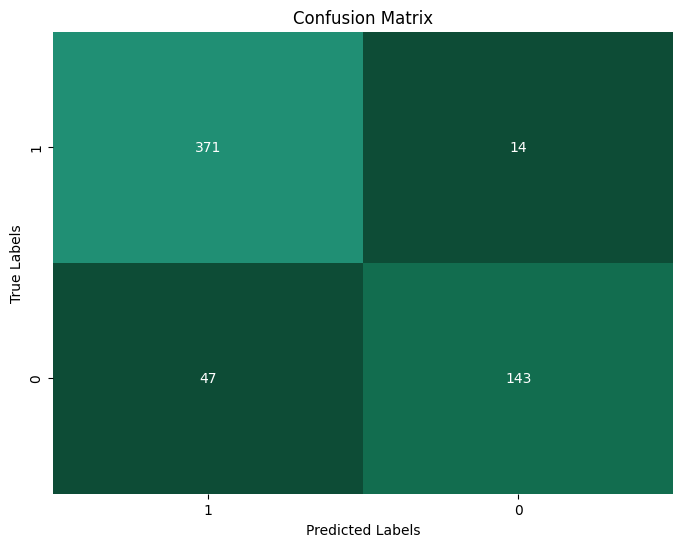

In [55]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.colors as mcolors

# Assuming you have the true labels (y_test) and predicted labels (y_pred_on_test)
confusion = confusion_matrix(y_test, y_pred_on_test)
target_names = df['REDLIGHT'].unique().astype(str)

# Define different shades of the color #16745a
color_list = ['#0d4c36', '#126d4f', '#16745a', '#1b7a63', '#208f74']

# Create a custom colormap using ListedColormap
custom_cmap = mcolors.ListedColormap(color_list)

# Create a confusion matrix heatmap with custom colormap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap=custom_cmap, cbar=False,
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


## relations 

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data

selected_columns = ['ALCOHOL', 'AUTOMOBILE', 'INVAGE_35 to 39', 'INVAGE_45 to 49',
       'INVAGE_55 to 59', 'INVAGE_60 to 64', 'INVAGE_65 to 69',
       'INVAGE_70 to 74', 'INVAGE_75 to 79', 'INVAGE_80 to 84',
       'LIGHT_Dawn, artificial', 'LIGHT_Daylight, artificial',
       'LIGHT_Dusk, artificial', 'MOTORCYCLE', 'PASSENGER', 'TRUCK',
       'VISIBILITY_Clear', 'VISIBILITY_Fog, Mist, Smoke, Dust',
       'VISIBILITY_Rain', 'Y']

# Create bar plots for each selected column grouped by 'REDLIGHT'
for column in selected_columns[:-1]:  # Exclude 'REDLIGHT'
    plt.figure(figsize=(8, 6))
    sns.barplot(x=column, y='REDLIGHT', data=df)
    plt.title(f'{column} vs REDLIGHT')
    plt.xlabel(column)
    plt.ylabel('REDLIGHT')
    plt.show()

# Heatmap for Correlation of Selected Columns
selected_correlation_matrix = df[selected_columns].corr()
plt.figure(figsize=(20, 20))  # Adjust the figsize here
sns.heatmap(selected_correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Selected Columns')
plt.show()
